In [1]:
import numpy as np
import weylchamber
from nuop_script import TemplateCircuit
from scipy import optimize as opt
import pickle
import weylchamber
from custom_gates import *
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

2


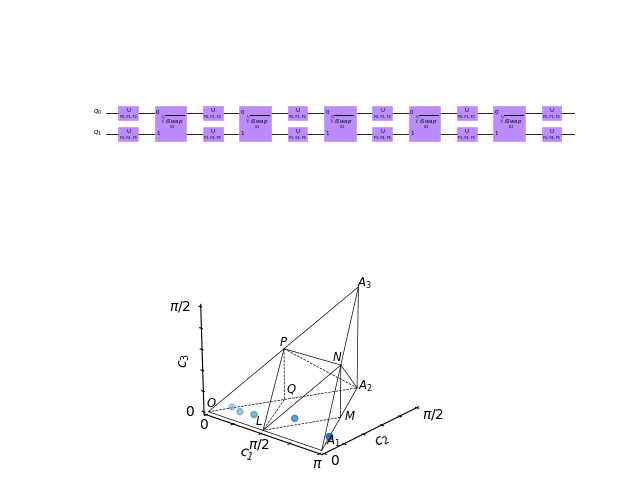

In [19]:
fig = plt.figure()
subfigs = fig.subfigures(2,1)
axs = subfigs[0].subplots(1, 1)
w = weylchamber.WeylChamber()
template = TemplateCircuit(gate_2q_params=[1/5],trotter=True)
for i in range(6):
    template.build(i)
    Xk = template.initial_guess()
    coordinate = weylchamber.c1c2c3(template.eval(Xk))
    w.add_point(*coordinate)
w.plot(subfigs[1])

print(subfigs.size)
template.circuit.draw(output='mpl', ax=axs)

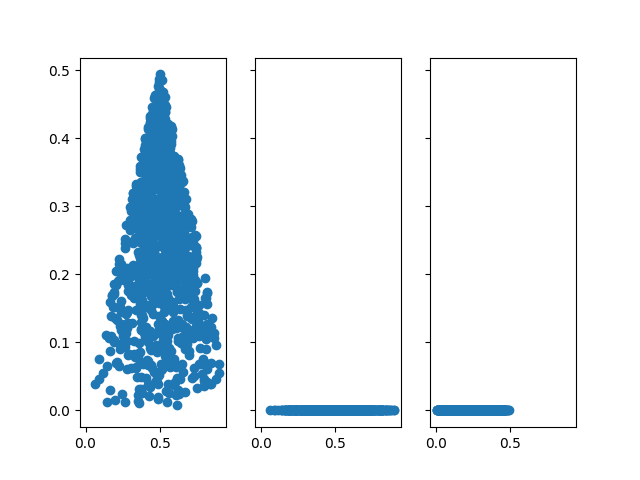

In [4]:
#supercontrolled gate Ub ~ Ud(pi/4, B, 0)
#two applications of supercontrolled Ub yields
#Uc(2) = K1 Ud(alpha_t, beta_t, 0) Kt_2
#remember this package has scaling on coordinates so pi/4 -> 1/2
from custom_gates import *
from weylchamber import c1c2c3
cx = lambda _ : CanonicalGate(np.pi/4, 0, 0)
template = TemplateCircuit(base_gate_class=[cx], gate_2q_params=[None])
template.build(2)

x = []
y = []
z = []
for _ in range(1000):
    Xk = template.initial_guess()
    xt,yt,zt = c1c2c3(template.eval(Xk))
    x.append(xt)
    y.append(yt)
    z.append(zt)

fig,axs = plt.subplots(1,3, sharex=True, sharey=True)
axs[0].scatter(x,y)
axs[1].scatter(x,z)
axs[2].scatter(y,z)

In [5]:
from weylchamber import random_gate, c1c2c3
g1 = random_gate()
c1 = c1c2c3(g1)
print(c1)
c2 = c1c2c3(g1.dag())
print(c2)
#show that dagger is symmetry over x axis

(0.59485845, 0.2351757, 0.05012005)
(0.40514155, 0.2351757, 0.05012005)


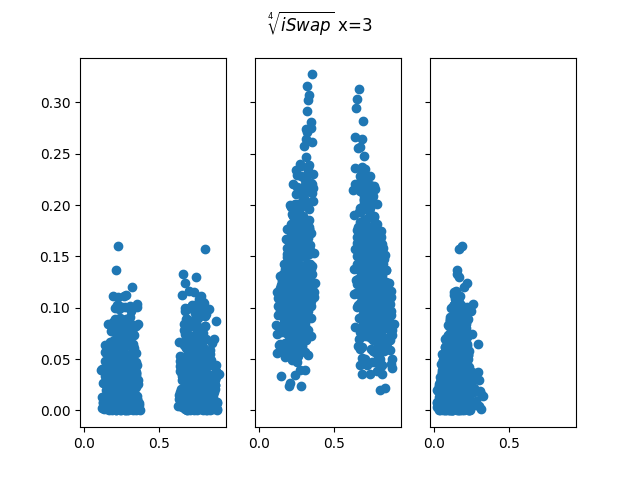

In [6]:
gate_params = [1/4]
template = TemplateCircuit(gate_2q_params=gate_params)
reps=3
template.build(reps)

x = []
y = []
z = []
for _ in range(1000):
    Xk = template.initial_guess()
    xt,yt,zt = c1c2c3(template.eval(Xk))
    x.append(xt)
    y.append(yt)
    z.append(zt)

fig,axs = plt.subplots(1,3, sharex=True,sharey=True)# sharex=True, sharey=True)
axs[0].scatter(x,z)
axs[1].scatter(x,y)
axs[2].scatter(y,z)
fig.suptitle(RiSwapGate.latex_string(gate_params) + f" x={reps}")

# from scipy.spatial import ConvexHull, convex_hull_plot_2d
# xtt = [1-xi if xi>.5 else xi for xi in x]
# hull = ConvexHull([(xi,yi) for xi,yi in zip(xtt,z)])
# _ = convex_hull_plot_2d(hull, axs[1])
# coordinates = np.array(list(zip(xtt,z)))
# for i in hull.simplices:
#     i = np.append(i, i[0])
#     axs[1].plot(coordinates[i,0], coordinates[i,1], 'r--', lw=2)
plt.show()

In [7]:
def trace(delta_a, delta_b, delta_g):
    return 4*np.cos(delta_a)*np.cos(delta_b)*np.cos(delta_g) - 4*1j*np.sin(delta_a)*np.sin(delta_b)*np.sin(delta_g)
def favg(delta_a, delta_b, delta_g):
    return (4 + np.abs(trace(delta_a, delta_b, delta_g))**2)/20

# from sympy import Symbol
# from sympy import cos, sin
# def trace(delta_a, delta_b, delta_g):
#     return 4*cos(delta_a)*cos(delta_b)*cos(delta_g) - 4*1j*sin(delta_a)*sin(delta_b)*sin(delta_g)
# def favg(delta_a, delta_b, delta_g):
#     return (4 + np.abs(trace(delta_a, delta_b, delta_g))**2)/20

# gamma = Symbol("g")
# favg(0,0, .24-gamma)

Text(0.5, 1.0, 'sqrt[2] iswap')

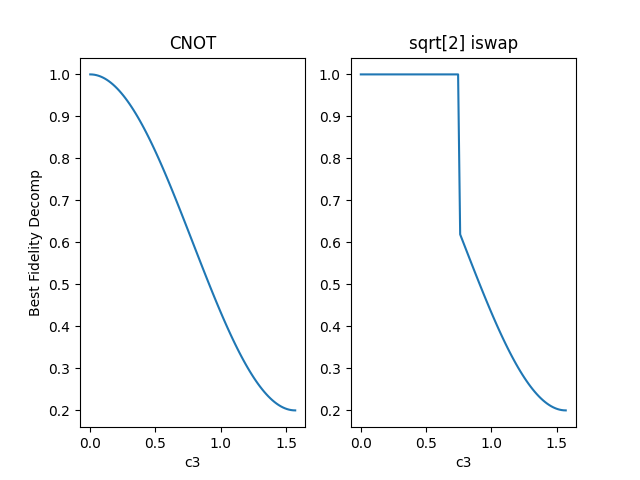

In [12]:
fig, axs = plt.subplots(1,2)
g = []
fid = []
for gt in np.linspace(0, np.pi/2, 100):
    fidt = favg(0,0, gt-0)
    g.append(gt)
    fid.append(fidt)
axs[0].plot(g, fid)
axs[0].set_xlabel("c3")
axs[0].set_ylabel("Best Fidelity Decomp")
g = []
fid = []
for gt in np.linspace(0, np.pi/2, 100):
    gtt = 0 if gt <= .24*np.pi else gt
    fidt = favg(0,0, gtt)
    g.append(gt)
    fid.append(fidt)
axs[1].plot(g, fid)
axs[1].set_xlabel("c3")
axs[0].set_title("CNOT")
axs[1].set_title("sqrt[2] iswap")